In [197]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from dGbyG.utils.custom_tools import rapid_process_result, rapid_linear_reg
from dGbyG.config import train_data_path

In [226]:
TrainingData_df = pd.read_csv(train_data_path)
real_r = TrainingData_df.loc[:,'standard_dg_prime'].to_numpy().reshape(-1)
mean_std = TrainingData_df.loc[:,'std'].mean()

Scale = []
for n, sem in zip(TrainingData_df.loc[:,'n'], TrainingData_df.loc[:,'SEM']):
    if np.isnan(sem):
        scale = mean_std
    else:
        scale = (sem**2 + mean_std**2/n)**0.5
    Scale.append(scale)
Scale = np.array(Scale)

sem = TrainingData_df.loc[:,'SEM'].to_numpy()

results_dir = '../data/results_data/cross_validation_results'

In [ ]:
Loss = []
Results = []
Final_p = []
R = []
for n in range(150,200):
    name = '10_fold_cross_validation_with_random_dG_'+str(n)
    loss = np.load(os.path.join(results_dir, name+'.npy')).mean(axis=0)
    res = pd.read_csv(os.path.join(results_dir, name+'.csv'), index_col=0)
    idx = np.argmin(loss)

    Loss.append(loss)
    Results.append(res)
    Final_p.append(res.loc[:,str(idx)].to_numpy())
    R.append(res['r'].to_numpy())

Loss = np.array(Loss)
R = np.array(R)
Final_p = np.array(Final_p)

The linear model is: Y = -1.4725 + 0.99505X
PearsonRResult(statistic=0.9975749771151219, pvalue=0.0)
SignificanceResult(statistic=0.9256211676293451, pvalue=3.326827756583962e-286)


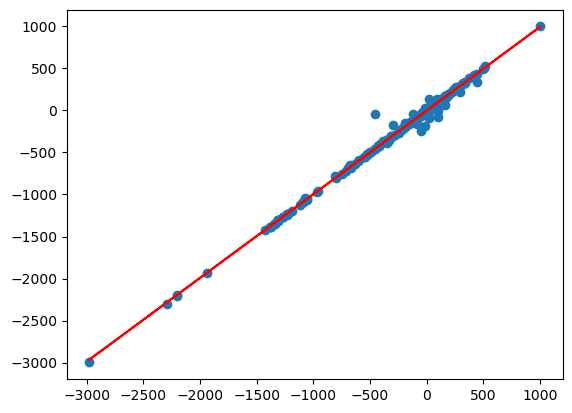

4.270415348357496 0.14415499059852807


In [217]:
x = rapid_linear_reg(real_r, Final_p.mean(axis=0), plot=True)

mae = np.median(np.abs(Final_p - real_r.reshape(1,-1)), axis=1)#
print(mae.mean(), mae.std())

In [218]:
Final_p.shape

(50, 675)

In [221]:
p_std = Final_p.std(axis=0)

In [72]:
mae = np.median(ae, axis=1)
mae0 = np.median(ae0, axis=1)

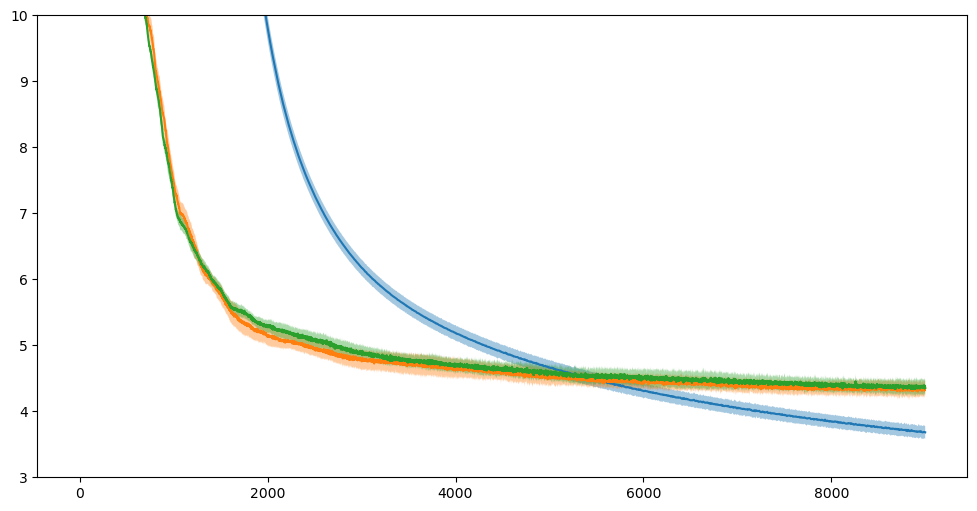

In [81]:
plt.figure(dpi=100,figsize = (12,6))

plt.plot(Loss.mean(axis=0), )
plt.fill_between(range(Loss.shape[-1]), Loss.mean(axis=0)+Loss.std(axis=0), Loss.mean(axis=0)-Loss.std(axis=0),alpha=0.4)

plt.plot(mae.mean(axis=0))
plt.fill_between(range(mae.shape[-1]), mae.mean(axis=0)+mae.std(axis=0), mae.mean(axis=0)-mae.std(axis=0),alpha=0.4)
plt.plot(mae0.mean(axis=0))
plt.fill_between(range(mae0.shape[-1]), mae0.mean(axis=0)+mae0.std(axis=0), mae0.mean(axis=0)-mae0.std(axis=0),alpha=0.4)
plt.ylim(3,10)
plt.show()